# Galactic Diffuse Continuum

This tutorial demonstrates how to do a spectral fit of the Galactic diffuse continuum emission using an input GALPROP model in healpix format. 

In [1]:
# imports:
from cosipy import COSILike, test_data, BinnedData
from cosipy.spacecraftfile import SpacecraftFile
from cosipy.response.FullDetectorResponse import FullDetectorResponse
from cosipy.threeml.custom_functions import GalpropHealpixModel
from cosipy.util import fetch_wasabi_file
from threeML import PointSource, Model, JointLikelihood, DataList, update_logging_level
from threeML.analysis_results import *
from astromodels import *
from astromodels.functions import GalPropTemplate_3D
import numpy as np
import matplotlib.pyplot as plt
import sys
import logging

# Set logging output:
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

12:49:10 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=358685;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=333341;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#47\47]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=228976;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=731250;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#68\68]8;;\
                  will not be available.                                                                           

12:49:12 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=829569;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=212654;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

12:49:14 INFO      Starting 3ML!                                                                     ]8;id=720210;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=68539;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#39\39]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=498032;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=93651;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=738961;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=514452;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#41\41]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=622831;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=587352;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#44\44]8;;\

         WARNING   no display variable set. using backend for graphics without display (agg)         ]8;id=101040;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=1425;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#50\50]8;;\

12:49:16 WARNING   ROOT minimizer not available                                                ]8;id=23803;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=636111;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=969079;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=905155;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=758268;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=698548;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

12:49:17 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=757413;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=3212;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=46797;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=230087;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

12:49:18 WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=794304;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=781832;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

12:49:21 WARNING   No fermitools installed                                              ]8;id=443323;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=134891;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

12:49:21 WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=670944;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=109475;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=601235;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=178982;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=879090;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=615907;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

### Get the data

In [ ]:
# ori file
fetch_wasabi_file('COSI-SMEX/DC3/Data/Orientation/DC3_final_530km_3_month_with_slew_15sbins_GalacticEarth_SAA.ori', checksum = 'e5e71e3528e39b855b0e4f74a1a2eebe')

In [ ]:
# response file
fetch_wasabi_file('COSI-SMEX/DC3/Data/Responses/ResponseContinuum.o3.e100_10000.b10log.s10396905069491.m2284.filtered.nonsparse.binnedimaging.imagingresponse_nside8.area.good_chunks.h5.zip', unzip = True, checksum = 'b8e1772c9bca3d0726f0c0956ccb0786')

In [ ]:
# background file
fetch_wasabi_file('COSI-SMEX/DC3/Data/Backgrounds/Ge/AlbedoPhotons_3months_unbinned_data_filtered_with_SAAcut.fits.gz', checksum = '191a451ee597fd2e4b1cf237fc72e6e2')

In [ ]:
# source file
# NB: this is a special file without SAA events removed
fetch_wasabi_file('COSI-SMEX/DC3/Data/Sources/GalTotal_SA100_F98_3months_unbinned_data_filtered.fits.gz', checksum = '3078964230a9612dfcf06b7764d2df1f')

In [ ]:
# precomputed point source response
fetch_wasabi_file('COSI-SMEX/DC3/Data/Responses/extended_source_response/extended_source_response_continuum_merged.h5.gz', unzip = True, checksum = '92ed7e22b1dafce6b57611d5cdb6cf70')

In [ ]:
# GALPROP input model
fetch_wasabi_file('COSI-SMEX/cosipy_tutorials/galactic_diffuse_continuum/total_healpix_57_SA100_F98_example.gz', checksum = '82cbeb9a86d86637f19f31c762f379fc')

Input files:

In [8]:
rsp_file = "ResponseContinuum.o3.e100_10000.b10log.s10396905069491.m2284.filtered.nonsparse.binnedimaging.imagingresponse_nside8.area.good_chunks.h5"
ori_file = "DC3_final_530km_3_month_with_slew_15sbins_GalacticEarth_SAA.ori"
BG_file = "AlbedoPhotons_3months_unbinned_data_filtered_with_SAAcut.fits.gz"
src_file = "GalTotal_SA100_F98_3months_unbinned_data_filtered.fits.gz"
psr_file = "extended_source_response_continuum_merged.h5"
galprop_model_file = "total_healpix_57_SA100_F98_example.gz"

### Make the dataset and bin
This step only needs to be run once. Afterwards, the files can be loaded directly using the cell below. 

In [ ]:
# Make combined dataset:
analysis = BinnedData("galdiff.yaml")
input_files = [BG_file,src_file]
analysis.combine_unbinned_data(input_files, output_name="combined_data_noSAAcut")

# Bin galdiff:
galdiff = BinnedData("galdiff.yaml")
galdiff.get_binned_data(unbinned_data=src_file, output_name="galdiff_binned_data_noSAAcut")

# Bin background:
bg_tot = BinnedData("galdiff.yaml")
bg_tot.get_binned_data(unbinned_data=BG_file, output_name="albedo_photons_binned_data")

# Bin combined data:
data_combined = BinnedData("galdiff.yaml")
data_combined.get_binned_data(unbinned_data="combined_data_noSAAcut.fits.gz", output_name="combined_binned_data_noSAAcut")

Load binned files:

In [14]:
galdiff = BinnedData("galdiff.yaml")
galdiff.load_binned_data_from_hdf5(binned_data="galdiff_binned_data_noSAAcut.hdf5")

# Load background:
bg_tot = BinnedData("galdiff.yaml")
bg_tot.load_binned_data_from_hdf5(binned_data="albedo_photons_binned_data.hdf5")

# Load combined data:
data_combined = BinnedData("galdiff.yaml")
data_combined.load_binned_data_from_hdf5(binned_data="combined_binned_data_noSAAcut.hdf5")

INFO:yayc.configurator:Using configuration file at galdiff.yaml
INFO:yayc.configurator:Using configuration file at galdiff.yaml
INFO:yayc.configurator:Using configuration file at galdiff.yaml


### Define GALPROP model
Below is how to define the custom GALPROP model. We will save the model to a yaml file so that it can be directly uploaded in the future (as shown at the bottom). 

In [15]:
# defining the model:
galprop_model = GalpropHealpixModel()
galprop_model.load_file(galprop_model_file)

# The spectrum is defined in the data cube, 
# and so we use a dummy model for defining an extended source in astromodels. 
# NB: This has no impact on the results - just make sure the parameter is fixed!
spectrum = Constant()
spectrum.k.value = 0.0
spectrum.k.free = False

src = ExtendedSource("galprop_source", spatial_shape=galprop_model, spectral_shape=spectrum)
model = Model(src)
model.save("galprop_model.yaml", overwrite=True)

# uncomment below to load saved model:
#model = load_model('galprop_model.yaml')

INFO:cosipy.threeml.custom_functions:loading GALPROP model: GALPROP_DC3/total_healpix_57_SA100_F98_example.gz


## Setup and perform fit
Set background parameter, which is used to fit the amplitude of the background:

In [16]:
bkg_par = Parameter("background_cosi",                                        # background parameter
                    1,                                                        # initial value of parameter
                    min_value=0,                                              # minimum value of parameter
                    max_value=5,                                              # maximum value of parameter
                    delta=0.05,                                               # initial step used by fitting engine
                    desc="Background parameter for cosi")

Specify orientation:

In [17]:
ori = SpacecraftFile.parse_from_file(ori_file)

Instantiate the COSI 3ML plugin

In [18]:
cosi = COSILike("cosi",                                                       # COSI 3ML plugin
    dr = rsp_file,                                                            # detector response
    data = data_combined.binned_data.project('Em', 'Phi', 'PsiChi'),          # data (source+background)
    bkg = bg_tot.binned_data.project('Em', 'Phi', 'PsiChi'),                  # background model
    sc_orientation = ori,                                                     # spacecraft orientation
    nuisance_param = bkg_par,                                                 # background parameter                        
    precomputed_psr_file = psr_file)                                          # precomputed extended source response 

INFO:cosipy.threeml.COSILike:... loading the pre-computed image response ...
INFO:cosipy.threeml.COSILike:--> done


Perform fit:

In [19]:
plugins = DataList(cosi)
like = JointLikelihood(model, plugins, verbose = True)
like.fit()

# Save results to file:
results = like.results
results.write_to("fit_results.fits", overwrite=True)

INFO:cosipy.threeml.custom_functions:Interpolating GALPROP map...
INFO:cosipy.response.functions_3d:Integrating intensity over energy bins...


13:10:48 INFO      set the minimizer to minuit                                             ]8;id=77387;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=858743;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1046\1046]8;;\

         INFO      trial values: 1,1 -> logL = 186212153.649                               ]8;id=955841;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=175709;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:10:49 INFO      trial values: 1.0201,1 -> logL = 186215762.858                          ]8;id=561167;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=543025;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.9801,1 -> logL = 186207380.682                          ]8;id=405339;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=559167;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0055,1 -> logL = 186213267.638                          ]8;id=960392;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=935796;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.99448,1 -> logL = 186210950.867                         ]8;id=950139;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=445266;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:10:50 INFO      trial values: 1,1.0201 -> logL = 186217489.541                          ]8;id=764611;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=996588;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1,0.98007 -> logL = 186197192.051                         ]8;id=550898;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=896027;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1,1.002 -> logL = 186213118.766                           ]8;id=719184;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=362388;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1,0.998 -> logL = 186211092.275                           ]8;id=434699;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=632383;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:10:51 INFO      trial values: 1.0734,1.0211 -> logL = 186215678.055                     ]8;id=206389;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=982627;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0422,1.0122 -> logL = 186219615.785                     ]8;id=501211;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=361725;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0478,1.0122 -> logL = 186219635.062                     ]8;id=312409;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=864277;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0365,1.0122 -> logL = 186219505.287                     ]8;id=266840;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=769936;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:10:52 INFO      trial values: 1.0422,1.0142 -> logL = 186219494.526                     ]8;id=896754;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=316662;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0422,1.0103 -> logL = 186219649.772                     ]8;id=945617;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=595698;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0466,1.0106 -> logL = 186219714.643                     ]8;id=929294;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=47035;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:10:53 INFO      trial values: 1.0583,1.0065 -> logL = 186219822.327                     ]8;id=575048;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=189237;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0639,1.0065 -> logL = 186219773.544                     ]8;id=378876;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=914151;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0527,1.0065 -> logL = 186219781.279                     ]8;id=782273;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=677960;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0583,1.0084 -> logL = 186219775.088                     ]8;id=259052;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=452721;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:10:54 INFO      trial values: 1.0583,1.0046 -> logL = 186219780.881                     ]8;id=614335;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=795420;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0065 -> logL = 186219822.408                      ]8;id=817958;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=150055;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0636,1.0065 -> logL = 186219778.044                     ]8;id=496524;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=730913;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0525,1.0065 -> logL = 186219777.989                     ]8;id=897106;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=884186;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:10:55 INFO      trial values: 1.058,1.0084 -> logL = 186219778.018                      ]8;id=610060;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=664069;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0046 -> logL = 186219777.996                      ]8;id=477808;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=73113;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0065 -> logL = 186219822.408                      ]8;id=114123;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=728842;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0636,1.0065 -> logL = 186219778.044                     ]8;id=415753;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=339453;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:10:56 INFO      trial values: 1.0525,1.0065 -> logL = 186219777.989                     ]8;id=315008;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=138194;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0084 -> logL = 186219778.018                      ]8;id=917514;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=409457;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0046 -> logL = 186219777.996                      ]8;id=122625;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=523610;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0592,1.0065 -> logL = 186219820.648                     ]8;id=238268;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=875997;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:10:57 INFO      trial values: 1.0569,1.0065 -> logL = 186219820.617                     ]8;id=799310;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=171601;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0583,1.0065 -> logL = 186219822.340                     ]8;id=23884;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=853047;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0578,1.0065 -> logL = 186219822.334                     ]8;id=291467;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=972953;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:10:58 INFO      trial values: 1.058,1.0069 -> logL = 186219820.631                      ]8;id=807753;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=634312;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0061 -> logL = 186219820.633                      ]8;id=793137;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=159098;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0066 -> logL = 186219822.337                      ]8;id=535130;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=192766;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0064 -> logL = 186219822.337                      ]8;id=203524;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=258453;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:10:59 INFO      trial values: 1.0636,1.0084 -> logL = 186219669.505                     ]8;id=437989;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=39007;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0065 -> logL = 186219822.408                      ]8;id=843021;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=833021;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0583,1.0065 -> logL = 186219822.340                     ]8;id=421471;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=34318;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0578,1.0065 -> logL = 186219822.334                     ]8;id=212673;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=795251;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:11:00 INFO      trial values: 1.058,1.0066 -> logL = 186219822.337                      ]8;id=34836;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=117618;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0064 -> logL = 186219822.337                      ]8;id=812366;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=482867;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0581,1.0065 -> logL = 186219822.406                     ]8;id=274263;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=168480;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0065 -> logL = 186219822.405                      ]8;id=261699;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=239816;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:11:01 INFO      trial values: 1.058,1.0065 -> logL = 186219822.405                      ]8;id=321854;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=967376;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.058,1.0065 -> logL = 186219822.405                      ]8;id=116948;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=916405;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0583,1.0066 -> logL = 186219822.166                     ]8;id=933732;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=220191;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

13:11:02 WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=968394;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=698211;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/plugin_prototype.py#130\130]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Best fit values:

,result,unit
parameter,,
galprop_source.GalpropHealpixModel.K,1.0580 +/- 0.0009,
background_cosi,1.00650 +/- 0.00030,


Correlation matrix:

1.00,-0.72
-0.72,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
cosi,-1.862198e+08
total,-1.862198e+08


Values of statistical measures:

,statistical measures
AIC,-3.724396e+08
BIC,-3.724396e+08


## Make plots
Plot average intensity (averaged over full sky):

INFO:cosipy.threeml.custom_functions:using nside=8 from user input in evaluate method
INFO:cosipy.threeml.custom_functions:loading GALPROP model: GALPROP_DC3/total_healpix_57_SA100_F98_example.gz
INFO:cosipy.threeml.custom_functions:Interpolating GALPROP map...


intensity error:
[6.59350745e-07 6.97102280e-07 7.27085794e-07 7.67742899e-07
 8.11511683e-07 8.85828889e-07 9.62866237e-07 1.07716525e-06
 1.18708526e-06 1.34294481e-06]


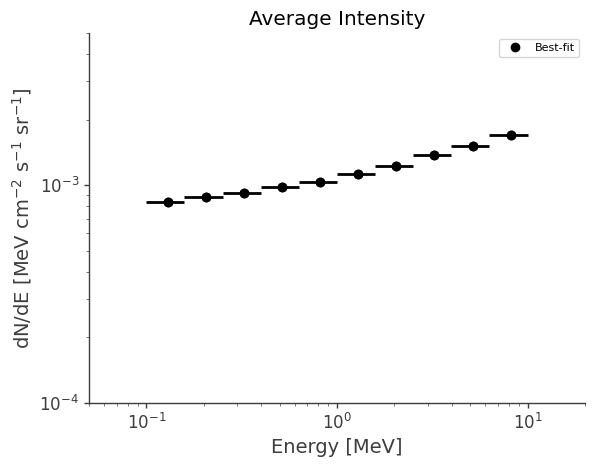

In [22]:
%matplotlib inline

# Get parameter error manually:
hdu = fits.open("fit_results.fits")
data = hdu[1].data
K = data['VALUE'][0]
Kerr = data["ERROR"][0]

# We will pass the response nside in order to use the same spatial sampling as the fit:
with FullDetectorResponse.open(rsp_file) as response:
    nside = response.nside

# We will also use the same energy values as was used in the fit:
binned_energy = galdiff.binned_data.axes['Em'].centers.to(u.MeV).value
binned_energy_edges = galdiff.binned_data.axes['Em'].edges.to(u.MeV).value
energy_err = np.diff(binned_energy_edges)/2.0

# Below we will pass avg_int=True in order to get the average intensity. Otherwise, the function returns the total intensity by default.
intensity = results.optimized_model["galprop_source"].spatial_shape.get_total_spatial_integral(binned_energy, avg_int=True, nside=nside)
intensity = intensity.value

yerr = (Kerr/K)*(intensity)
yerr *= (binned_energy**2)
print("intensity error:")
print(yerr)

intensity *= (binned_energy**2)

fig,ax = plt.subplots()

ax.loglog(binned_energy, intensity, ls="", marker="o", color="black", label = "Best-fit")
ax.errorbar(binned_energy, intensity, xerr=energy_err, yerr=yerr, ls="", marker="o", color="black", label = "_nolabel_")

# Plot model specturm with galpy:
# This is optional and requires galpy package:
# https://github.com/ckarwin/galpy
#from galpy import GalMapsHeal
#instance = GalMapsHeal()
#instance.read_healpix_file("GALPROP_DC3/total_healpix_57_SA100_F98_example.gz")
#instance.make_spectrum()
#gal_energy = instance.energy
#gal_spec = instance.spectra_list
#ax.loglog(gal_energy, gal_spec, ls="-", marker="", color="red", label = "GALPROP model")

plt.ylabel("dN/dE [$\mathrm{MeV \ cm^{-2} \ s^{-1} \ sr^{-1}}$]")
plt.xlabel("Energy [MeV]")
plt.title("Average Intensity")
ax.legend()
plt.xlim(5e-2,20)
plt.ylim(1e-4,5e-3)
plt.savefig("intensity.pdf")
plt.show()
plt.close()

Below we plot the best-fit spectrum just for demonstration. Again, this is just a dummy model since the spectrum is contained in the 3D data cube. This has no impact on the fit. 

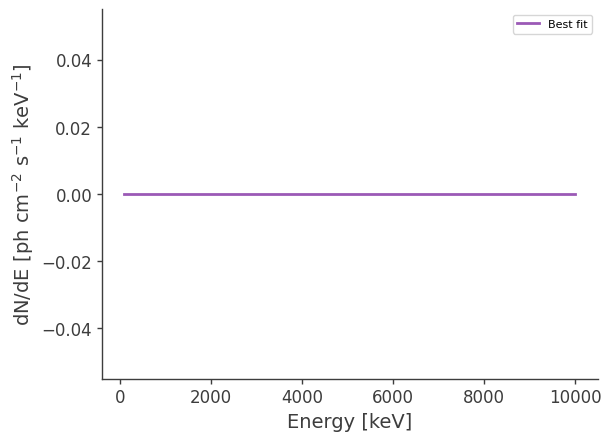

In [23]:
energy = np.linspace(100.,10000.,201)*u.keV
flux = results.optimized_model["galprop_source"].spectrum.main.shape(energy)

fig,ax = plt.subplots()

ax.plot(energy, flux, label = "Best fit")

plt.ylabel("dN/dE [$\mathrm{ph \ cm^{-2} \ s^{-1} \ keV^{-1}}$]", fontsize=14)
plt.xlabel("Energy [keV]", fontsize=14)
ax.legend()
plt.savefig("best_fit_model.pdf")
plt.show()
plt.close()

Compare best-fit to injected source:


galdiff expected counts:
[1.06254250e+06 2.59787805e+06 2.41639476e+06 1.51655592e+06
 8.99100768e+05 5.31369298e+05 3.23112120e+05 1.33937691e+05
 2.92729644e+04 1.42416154e+03]



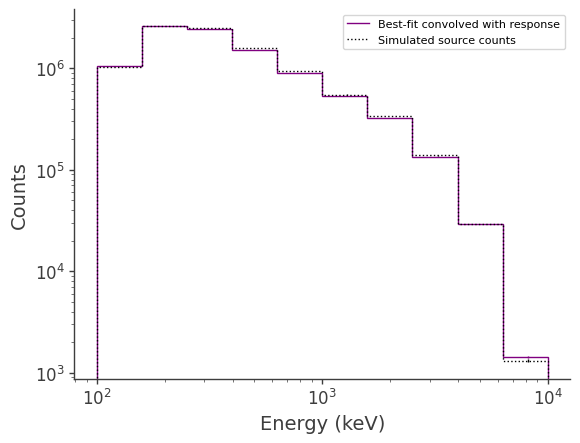

In [24]:
# Get expected counts from likelihood scan (i.e. best-fit convolved with response):
total_expectation = cosi._expected_counts['galprop_source']
print()
print("galdiff expected counts:")
print(total_expectation.project('Em').todense().contents)
print()

# Plot:
fig,ax = plt.subplots()

binned_energy_edges = galdiff.binned_data.axes['Em'].edges.value
binned_energy = galdiff.binned_data.axes['Em'].centers.value

ax.stairs(total_expectation.project('Em').todense().contents, binned_energy_edges, color='purple', label = "Best-fit convolved with response")
ax.errorbar(binned_energy, total_expectation.project('Em').todense().contents, yerr=np.sqrt(total_expectation.project('Em').todense().contents), color='purple', linewidth=0, elinewidth=1)
ax.stairs(galdiff.binned_data.project('Em').todense().contents, binned_energy_edges, color = 'black', ls = ":", label = "Simulated source counts")
ax.errorbar(binned_energy, galdiff.binned_data.project('Em').todense().contents, yerr=np.sqrt(galdiff.binned_data.project('Em').todense().contents), color='black', linewidth=0, elinewidth=1)

ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Counts")
plt.yscale('log')
plt.xscale('log')
ax.legend()
plt.savefig("injected_model_comparison.pdf")
plt.show()
plt.close()

percent difference: 

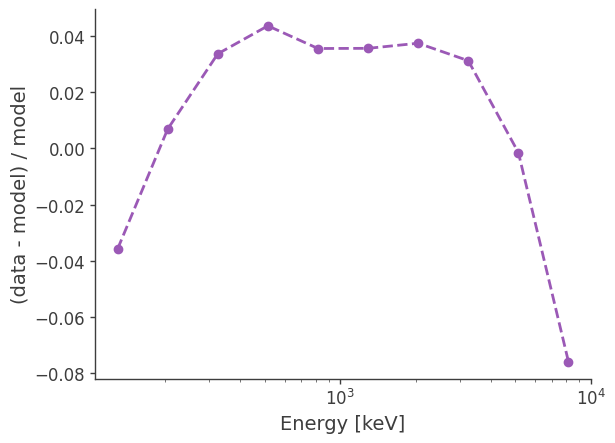

In [25]:
diff = (galdiff.binned_data.project('Em').todense().contents - total_expectation.project('Em').todense().contents)/total_expectation.project('Em').todense().contents

plt.semilogx(binned_energy,diff,ls="--",marker="o")
plt.xlabel("Energy [keV]")
plt.ylabel("(data - model) / model")
plt.savefig("percent_diff.pdf")
plt.show()
plt.close()

Compare best-fit to injected for total counts:

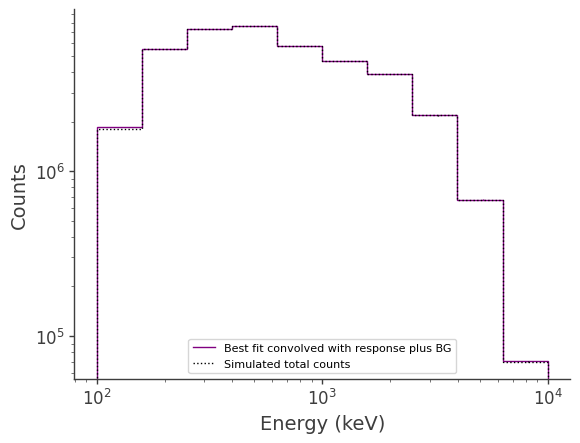

In [26]:
# Plot:
fig,ax = plt.subplots()

ax.stairs(total_expectation.project('Em').todense().contents \
        +(bkg_par.value * bg_tot.binned_data.project('Em').todense().contents) \
        , binned_energy_edges, color='purple', label = "Best fit convolved with response plus BG")
ax.errorbar(binned_energy, total_expectation.project('Em').todense().contents \
        +(bkg_par.value * bg_tot.binned_data.project('Em').todense().contents) \
        , yerr=np.sqrt(total_expectation.project('Em').todense().contents \
        +(bkg_par.value * bg_tot.binned_data.project('Em').todense().contents)), \
        color='purple', linewidth=0, elinewidth=1)
ax.stairs(data_combined.binned_data.project('Em').todense().contents, binned_energy_edges, \
        color = 'black', ls = ":", label = "Simulated total counts")
ax.errorbar(binned_energy, data_combined.binned_data.project('Em').todense().contents, \
        yerr=np.sqrt(data_combined.binned_data.project('Em').todense().contents), color='black', linewidth=0, elinewidth=1)

ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Counts")

ax.legend()
plt.yscale('log')
plt.xscale('log')
plt.savefig("injected_total_comparison.pdf")
plt.show()
plt.close()

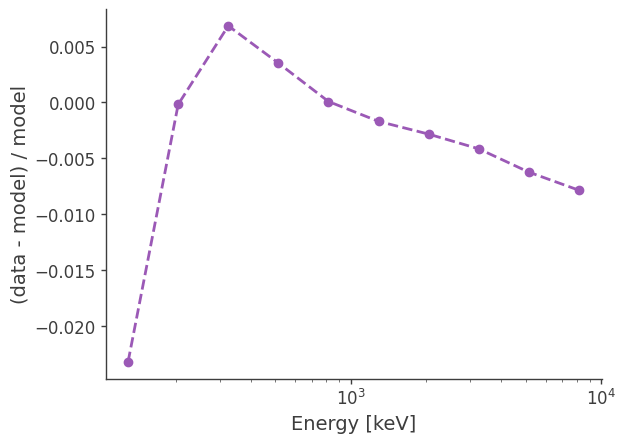

In [27]:
mod_tot = total_expectation.project('Em').todense().contents \
        +(bkg_par.value * bg_tot.binned_data.project('Em').todense().contents)
diff = (data_combined.binned_data.project('Em').todense().contents - mod_tot)/mod_tot

plt.semilogx(binned_energy,diff,ls="--",marker="o")
plt.xlabel("Energy [keV]")
plt.ylabel("(data - model) / model")
plt.savefig("percent_diff.pdf")
plt.show()
plt.close()